In [17]:
# relevant imports

# base
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# data prep
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from scipy import stats

# nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, average_precision_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, log_loss, precision_recall_curve
# !pip install seaborn
import seaborn as sn
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# uncomment !pip install commands if you get an error

In [3]:
# import feature data - make sure csv files are in the same directory
x_train = pd.read_csv("./x_train.csv")
x_val = pd.read_csv("./x_val.csv")

In [4]:
# import state data => no header, so you have to specify header=None
y_name = ["state"]
y_train = pd.read_csv("./y_train.csv", names=y_name, header=None)
y_val = pd.read_csv("./y_val.csv", names=y_name, header=None)

In [5]:
y_train['state'] = y_train['state'].astype('category')
y_val['state'] = y_val['state'].astype('category')

In [6]:
# flatten 1-column dataframe into series
y_train = y_train['state']
y_val = y_val['state']

In [7]:
#Start of Naive Bayes

In [8]:
#training the model
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(priors=None, var_smoothing=1e-09)
model.fit(x_train, y_train) 
# GaussianNB()
predictions = model.predict(x_val)
probabilities = model.predict_proba(x_val)

In [16]:
#print accuracy
print(np.mean(predictions == y_val))  
print ("Validation Accuracy: ", accuracy_score(y_val, predictions))

0.5855129268108842
Validation Accuracy:  0.5855129268108842


In [10]:
#print confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val, predictions)

Text(0.5,1,'Confusion Matrix for Gaussian Naive Bayes')

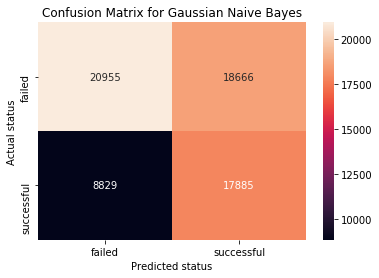

In [11]:
# best confusion matrix depiction using seaborn heatmap
class_names = y_val.unique()
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
fig = plt.figure()
heatmap = sn.heatmap(df_cm, annot=True, fmt="d")
plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('Confusion Matrix for Gaussian Naive Bayes')

In [12]:
# classification report with relevant statistics
cr = classification_report(y_val, predictions)
print(cr)

              precision    recall  f1-score   support

      failed       0.70      0.53      0.60     39621
  successful       0.49      0.67      0.57     26714

   micro avg       0.59      0.59      0.59     66335
   macro avg       0.60      0.60      0.58     66335
weighted avg       0.62      0.59      0.59     66335



In [66]:
print("Log loss: ", log_loss(y_val.cat.codes, probabilities))

Log loss:  11.422769855132755


In [15]:
# get probabilities for the positive class (second column in probabilities)
positive_probabilities = probabilities[:,1]
# is over 0.5 - which is the standard for a no-skill model
print("ROC_AUC score: ", roc_auc_score(y_val, positive_probabilities))

ROC_AUC score:  0.6323742264234977


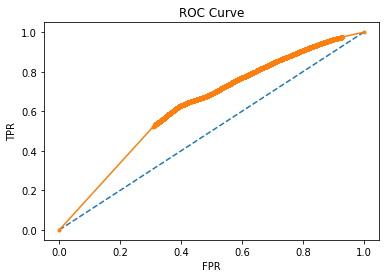

In [18]:
# our dataset is balanced - this one is better
# plot ROC curve
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
fpr, tpr, thresholds = roc_curve(y_val, positive_probabilities, pos_label="successful")
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

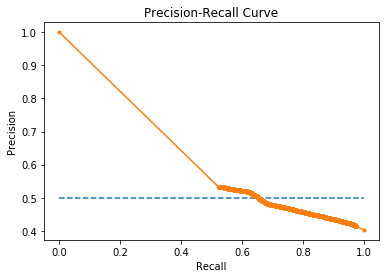

In [19]:
# plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, positive_probabilities, pos_label="successful")
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
# show the plot
plt.show()